- **Nom**: David Morillo Massagué
- **NIU**: 1666540

### 1. Considerem un sistema de passwords que fa servir passwords d’un màxim de 14 caràcters on cada caràcter pot tenir 32 possibles valors. Si un password té menys de 14 caràcters s’afegeix el caràcter null fins arribar a 14 caràcters. El password final amb 14 caràcters és P. Donada una funció hash criptogràfica h considera els següents esquemes:
- Pass1 P es divideix en dues parts de 7 caràcters X, Y . El password es guarda com (h(X), h(Y )). No es fa servir salt.
- Pass2 P es guarda com h(P). No es fa servir salt

1. Quin esquema és més segur? Per què?

És molt mes segur el Pass2 que el Pass1, ja que resisteix els atacs de força bruta molt millor. Si dividim la contrassenya P en dues parts X i Y i un atacant sap que la constrassenya es cuarda com (h(X), h(Y)), pot provar valors de h(X) i h(Y) per separat, eventualment conseguint una coincidència, i per separat, l'altra, de manera molt més ràpida que si hagués de provar tots els valors possibles de P, de 14 caràcters. Amb Pass2, l'atacant ha de provar un total de 32^14 valors possibles, que és molt més gran que 32^7 + 32^7 (no 32^7 * 32^7), que és el nombre de valors possibles per a Pass1. Pass2 és més segur perquè redueix significativament el nombre de combinacions que un atacant ha de provar per trobar la contrassenya correcta.

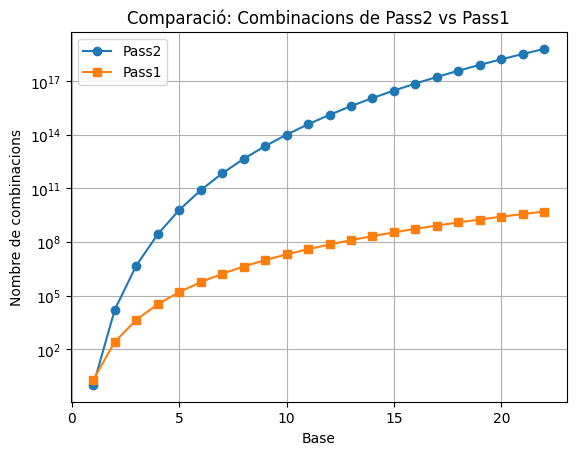

In [10]:
import matplotlib.pyplot as plt
import numpy as np

bases = np.arange(1, 23)
valors_14 = bases ** 14
valors_7 = bases ** 7 + bases ** 7

plt.plot(bases, valors_14, label='Pass2', marker='o')
plt.plot(bases, valors_7, label='Pass1', marker='s')
plt.yscale('log')
plt.xlabel('Base')
plt.ylabel('Nombre de combinacions')
plt.title('Comparació: Combinacions de Pass2 vs Pass1')
plt.legend()
plt.grid(True)
plt.show()

Podem veure en aquest gràfic en escala logarítmica, que el nombre de combinacions per a Pass2 (P) és molt més gran que el nombre de combinacions per a Pass1 (X, Y), a mesura que augmenten els valors possibles a la contrasenya. Això confirma que Pass2 és molt més segur que Pass1, ja que l'atacant hauria de provar un nombre exponencialment més gran de combinacions per trobar la contrassenya correcta.

2. En l’esquema Pass1 es podria donar que un password de 10 caràcters fos menys segur que un de 7?

Si, però només en casos en els que la contrasenya de 10 caràcters tingui una gran quantitat de caràcters repetits, o es pugui trobar en un diccionari de contrasenyes comunes. En aquest cas, la contrasenya de 10 caràcters podria tenir menys entropia que una contrasenya de 7 caràcters que sigui més aleatòria i complexa. Però en general, una contrasenya de 10 caràcters tindrà més entropia que una de 7 caràcters, ja que hi ha més combinacions possibles. En la de 7 caràcters, h(Y) sempre donarà la mateix sortida ja que és el hash de 7 caràcters nulls.

### 2. Suposem que tenim un sistema de passwords on cada password és de 8 caràcters i cada caràcter pot tenir 128 valors. El sistema té un fitxer amb passwords resumits amb alguna mena d’esquema basat en funcions hash que conté 2 10 passwords diferents.

Un atacant, Eva, té un diccionari amb 2 20 passwords comuns, i la probabilitat que un password qualsevol estigui al diccionari és d’1/4. Assumim que el cost de pre-computar passwords és extremament costós i per tant no es pot fer. Si no es diu el contrari assumim també que el sistema no fa servir salt.

Per aquest cas concret mesurem el cost en nombre de computacions de hashos de passwords. A més, mesurarem sempre el cost mig (no el pitjor cas).

1. Eva vol trobar el password de root sense fer servir el diccionari. Quin atac farà? Quin cost tindrà? I si el sistema fa servir salt?

In [20]:
characters = 8
values = 128

brute_force_cost = values ** characters
print(f"Cost de l'atac de força bruta sense salt: {brute_force_cost} computacions de hashos de passwords")

salt_len = 8  # longitud del salt en el nostre exemple
salt_values = 128
salted_brute_force_cost = (values ** characters) * (salt_values ** salt_len)
print(f"Cost de l'atac de força bruta amb salt: {salted_brute_force_cost} computacions de hashos de passwords")

Cost de l'atac de força bruta sense salt: 72057594037927936 computacions de hashos de passwords
Cost de l'atac de força bruta amb salt: 5192296858534827628530496329220096 computacions de hashos de passwords


L'atac que faria servir seria un atac de força bruta, on Eva provaria totes les combinacions possibles de contrasenyes. Sense salt, el cost d'aquest atac seria de 128^8 computacions de hashos de passwords, ja que hi ha 128 valors possibles per a cada un dels 8 caràcters de la contrasenya. Això és un nombre extremadament gran, i complicaria molt trobar la contrasenya correcta.

L'atac amb sal és molt més costós, ja que l'atacant ha de provar totes les combinacions possibles de la contrasenya i del salt. Això fa que el nombre total de computacions de hashos de passwords sigui molt més gran que en el cas sense salt. En aquest cas, l'atacant hauria de provar 128^8 * 128^8 = 128^16 combinacions, que és un nombre extremadament gran. Hauria de provar 128^8 vegades més combinacions amb salt que sense salt.

2. Ara Eva, vol trobar el password de root però sí que fa servir el seu diccionari. Quin atac farà? Quin cost total tindrà trobar el password?

In [21]:
# Fent servir diccionari (1/4 de probabilitat que el password estigui al diccionari)

dictionary_size = 2 ** 10
probability_in_dictionary = 1 / 4
brute_force_cost = 128 ** 8
expected_cost = dictionary_size * probability_in_dictionary + (1 - probability_in_dictionary) * brute_force_cost
print(f"Cost esperat de l'atac amb diccionari: {expected_cost} computacions de hashos de passwords")

Cost esperat de l'atac amb diccionari: 5.404319552844621e+16 computacions de hashos de passwords


L'atac que faria servir Eva seria un atac de diccionari, on provaria totes les contrasenyes del seu diccionari. El cost total esperat d'aquest atac seria de 2^10 * (1/4) + (3/4) * 128^8 computacions de hashos de passwords. Això és perquè hi ha una probabilitat d'1/4 que la contrasenya estigui al diccionari, i en aquest cas Eva només hauria de provar 2^10 contrasenyes. Si la contrasenya no està al diccionari, hauria de provar totes les combinacions possibles de la contrasenya, que és 128^8. El cost esperat és una combinació de les dues possibilitats, ponderada per les seves probabilitats. Això fa que l'atac de diccionari sigui molt més eficient que un atac de força bruta, ja que redueix significativament el nombre de computacions necessàries per trobar la contrasenya correcta, encara que només trobi la contrasenya al diccionari en un 25% dels casos.

3. Eva vol trobar qualsevol password del fitxer de passwords, sense fer servir el seu diccionari. Quin cost té aquest atac? Sense haver de tornar a calcular el cost indica quines implicacions tindria l’ús de salt.

In [22]:
total_cost = 2 ** 10 * (128 ** 8)
print(f"Cost de l'atac per trobar qualsevol password del fitxer: {total_cost} computacions de hashos de passwords")

Cost de l'atac per trobar qualsevol password del fitxer: 73786976294838206464 computacions de hashos de passwords


Si fes servir salt, l'atac tindria un cost molt més alt, de 128^8 vegades més (si la sal fos de 8 caràcters, com en l'exemple anteriorr). Això faria que l'atac fos molt més costós i difícil.

### 3. Implementeu les funcions Pass1 i Pass2 fent servir Python hash()

In [30]:
def pass1(password):
    # Dividim el password en dues parts de 7 caràcters
    x = password[:7]
    y = password[7:14] if len(password) > 7 else password[7:] + '\0' * (14 - len(password))

    # Retornem el hash de les dues parts
    return (hash(x), hash(y))

def pass2(password):
    # Retornem el hash del password complet
    return hash(password)

m = "abcdefghij"
print(f"Text original: {m}")
print(f"Pass1: {pass1(m)}")
print(f"Pass2: {pass2(m)}")

m = "abcd"
print(f"\nText original: {m}")
print(f"Pass1: {pass1(m)}")
print(f"Pass2: {pass2(m)}")

m = "1234"
print(f"\nText original: {m}")
print(f"Pass1: {pass1(m)}")
print(f"Pass2: {pass2(m)}")

Text original: abcdefghij
Pass1: (4252553413102719221, 1321560552388599222)
Pass2: 7752456423763007962

Text original: abcd
Pass1: (5094059731221886087, 495715104886336598)
Pass2: 5094059731221886087

Text original: 1234
Pass1: (-5718067760740632483, 495715104886336598)
Pass2: -5718067760740632483


Veiem, com hem dit a l'exercici 1.2, com el tenir una contrasenya de 7 o menys caràcters, h(Y) sempre donarà el mateix valor, ja que és el hash de 7 caràcters nulls.